Лабораторная работа 1. Бортниченко Анастасия. Группа РК6-64Б

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import *
from sklearn.metrics import mean_squared_error

data = pd.read_csv('lab1.csv', delim_whitespace = True, header=None, names = ['x', 'y'])
data = data.sort_values(by=['x'])


По точкам ,заданным в файле, мы можем построить график кусочно-линейной функции и по его виду понять, какую функцию нужно взять в качестве аппроксимирующей(так, например, можно догадаться в использовании периодической функции: на (-4; 4) напоминает косинус с отрицательным коэффициентом. ну а чтобы добиться таких экстремумов, необходим полином, причем четной степени, так как график функции, построенной по точкам, напоминает график четной функции)

[0.81 1.06 0.85]
Error:  4.088164992937223e-28


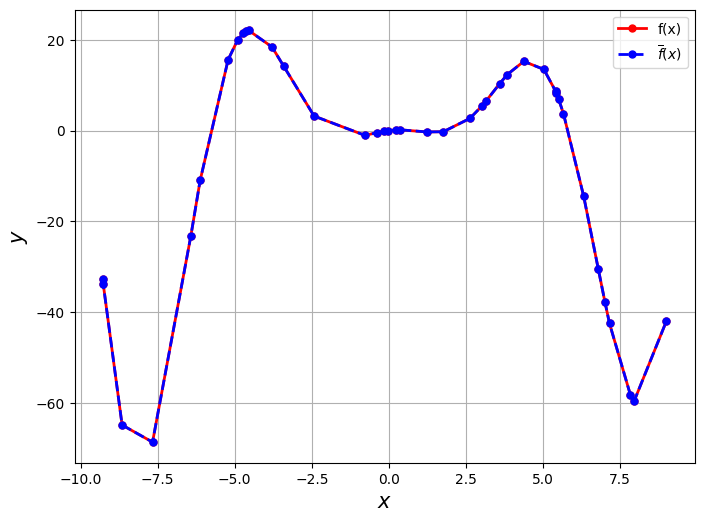

In [4]:
x = np.array([i for i in data['x']])
y = np.array([i for i in data['y']])

def f(x, a, b, c):
    return (-np.cos(a*x))*(b*x**2 - c*x)

coef, cov = curve_fit(f, x, y)
print(coef)     

new_y = f(x, *coef)
print ("Error: ",mean_squared_error(y,new_y))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)

axes.plot(x, y, 'r', lw=2,label="f(x)",marker='o',markersize=5,)
axes.plot(x, new_y, 'b', lw=2, ls='--', label=r"$\overline{f}(x)$",marker='o',markersize=5)
axes.grid()
axes.legend()

axes.set_xlabel(r"$x$", fontsize=15)
axes.set_ylabel(r"$y$", fontsize=15)
plt.show()